In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
#importing dataset
df=pd.read_csv('Mall_Customers (1).csv')

In [3]:
#top 5 records
df.head(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
#size of the data
df.shape

(200, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
# finding null values
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
#describing the data
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
#checking for duplicate
df.duplicated().sum()

0

In [9]:
#droping the serial number 
df.drop(['CustomerID'],axis=1,inplace=True)

In [10]:
df.head(1)

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39


In [11]:
df['Annual Income (k$)'].nunique()

64

In [12]:
df['Spending Score (1-100)'].nunique()

84

In [13]:
df['Age'].nunique()

51

In [14]:
df['Genre'].nunique()

2

# Univeriate Analysis and Biveriate Analysis

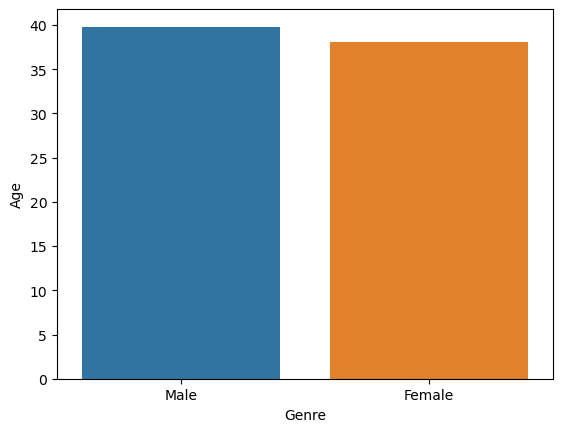

In [15]:
sns.barplot(x='Genre',y='Age',data=df,ci=None);

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

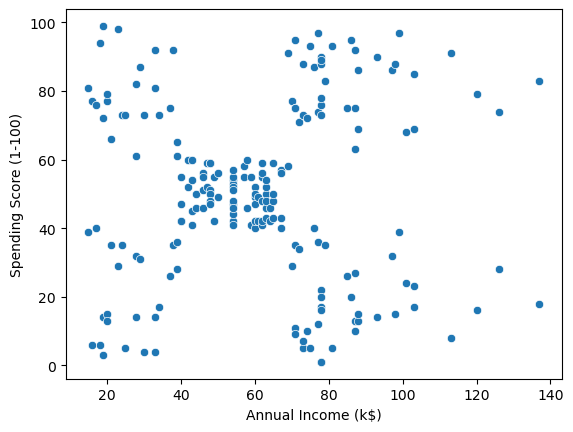

In [16]:
sns.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)',data=df)

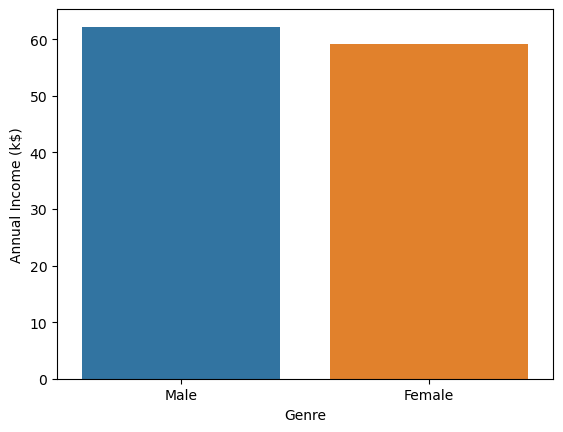

In [17]:
sns.barplot(x='Genre',y='Annual Income (k$)',data=df,ci=None);

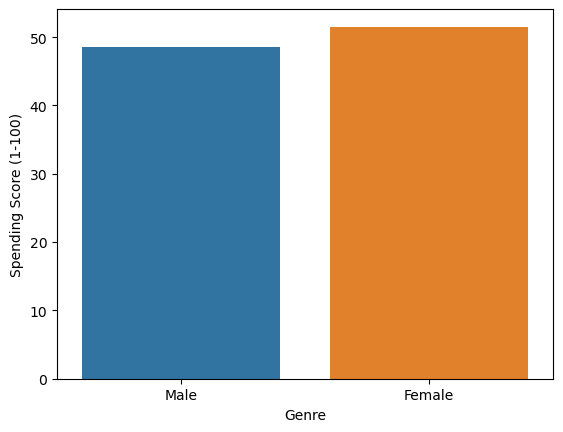

In [18]:
sns.barplot(x='Genre',y='Spending Score (1-100)',data=df,ci=None);

<AxesSubplot:xlabel='Age', ylabel='Spending Score (1-100)'>

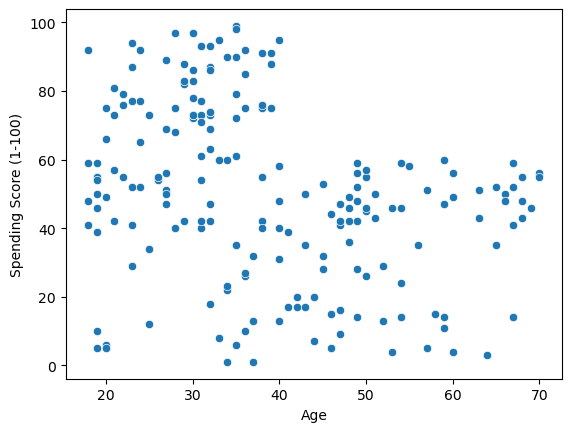

In [19]:
sns.scatterplot(x='Age',y='Spending Score (1-100)',data=df)

<AxesSubplot:xlabel='Age', ylabel='Annual Income (k$)'>

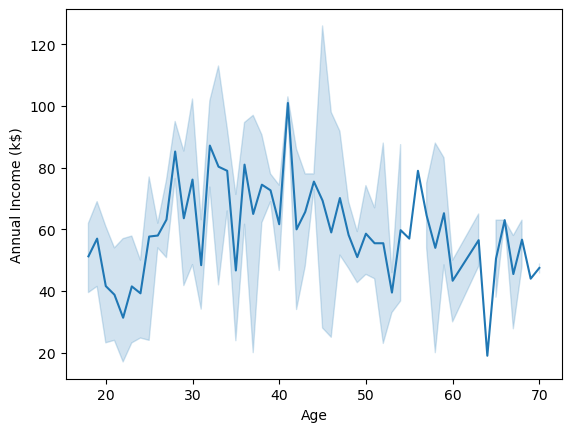

In [20]:
sns.lineplot(x='Age',y='Annual Income (k$)',data=df)

# Training the model

In [21]:
#copying the dataset 
malldata=df.copy()
malldata.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [22]:
#label encoding
df['Genre']=pd.Categorical(df['Genre']).codes
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


# Creating Dendogram
### Importing dendrogram and linkage module

In [23]:
#importing dendrogram libraries
from scipy.cluster.hierarchy import dendrogram,linkage


In [24]:
malldata.iloc[:,1:5]

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


##### choosing linkage method

In [25]:
#creating linkage menthod
link_method=linkage(malldata.iloc[:,1:6],method='average')

In [26]:
np.array(malldata['Spending Score (1-100)'])

array([39, 81,  6, 77, 40, 76,  6, 94,  3, 72, 14, 99, 15, 77, 13, 79, 35,
       66, 29, 98, 35, 73,  5, 73, 14, 82, 32, 61, 31, 87,  4, 73,  4, 92,
       14, 81, 17, 73, 26, 75, 35, 92, 36, 61, 28, 65, 55, 47, 42, 42, 52,
       60, 54, 60, 45, 41, 50, 46, 51, 46, 56, 55, 52, 59, 51, 59, 50, 48,
       59, 47, 55, 42, 49, 56, 47, 54, 53, 48, 52, 42, 51, 55, 41, 44, 57,
       46, 58, 55, 60, 46, 55, 41, 49, 40, 42, 52, 47, 50, 42, 49, 41, 48,
       59, 55, 56, 42, 50, 46, 43, 48, 52, 54, 42, 46, 48, 50, 43, 59, 43,
       57, 56, 40, 58, 91, 29, 77, 35, 95, 11, 75,  9, 75, 34, 71,  5, 88,
        7, 73, 10, 72,  5, 93, 40, 87, 12, 97, 36, 74, 22, 90, 17, 88, 20,
       76, 16, 89,  1, 78,  1, 73, 35, 83,  5, 93, 26, 75, 20, 95, 27, 63,
       13, 75, 10, 92, 13, 86, 15, 69, 14, 90, 32, 86, 15, 88, 39, 97, 24,
       68, 17, 85, 23, 69,  8, 91, 16, 79, 28, 74, 18, 83], dtype=int64)

In [27]:
label_list=np.array(malldata['Spending Score (1-100)'])
label_list

array([39, 81,  6, 77, 40, 76,  6, 94,  3, 72, 14, 99, 15, 77, 13, 79, 35,
       66, 29, 98, 35, 73,  5, 73, 14, 82, 32, 61, 31, 87,  4, 73,  4, 92,
       14, 81, 17, 73, 26, 75, 35, 92, 36, 61, 28, 65, 55, 47, 42, 42, 52,
       60, 54, 60, 45, 41, 50, 46, 51, 46, 56, 55, 52, 59, 51, 59, 50, 48,
       59, 47, 55, 42, 49, 56, 47, 54, 53, 48, 52, 42, 51, 55, 41, 44, 57,
       46, 58, 55, 60, 46, 55, 41, 49, 40, 42, 52, 47, 50, 42, 49, 41, 48,
       59, 55, 56, 42, 50, 46, 43, 48, 52, 54, 42, 46, 48, 50, 43, 59, 43,
       57, 56, 40, 58, 91, 29, 77, 35, 95, 11, 75,  9, 75, 34, 71,  5, 88,
        7, 73, 10, 72,  5, 93, 40, 87, 12, 97, 36, 74, 22, 90, 17, 88, 20,
       76, 16, 89,  1, 78,  1, 73, 35, 83,  5, 93, 26, 75, 20, 95, 27, 63,
       13, 75, 10, 92, 13, 86, 15, 69, 14, 90, 32, 86, 15, 88, 39, 97, 24,
       68, 17, 85, 23, 69,  8, 91, 16, 79, 28, 74, 18, 83], dtype=int64)

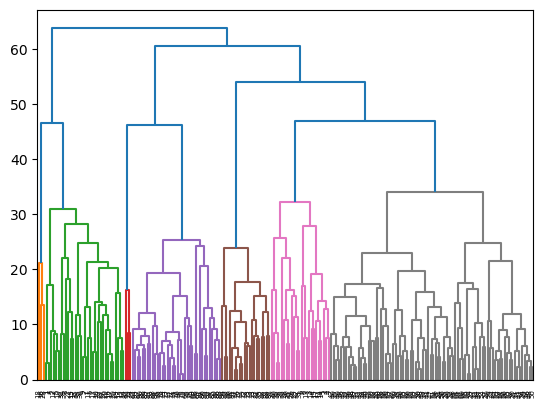

In [28]:
#creation of dendrogram
dend=dendrogram(link_method,labels=label_list)

#### Cutting the Dendogram

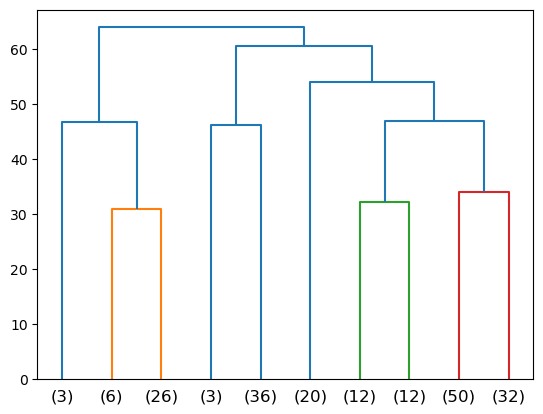

In [29]:
dend=dendrogram(link_method,labels=label_list,truncate_mode='lastp',p=10)

# Importing fcluster module to create clusters

In [30]:
#importing Fcluster
from scipy.cluster.hierarchy import fcluster

In [31]:
# Set criterion as maxclust,then create 3 clusters, and store the result in another object 'clusters'
cluster=fcluster(link_method,3,criterion='maxclust')
cluster

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 1, 2, 1, 2, 1, 2,
       3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int32)

In [32]:
 cluster=fcluster(link_method,4,criterion='distance')
cluster

array([ 88,  73,  99,  71,  87,  71,  97,  70, 102,  76, 100,  68, 101,
        72,  98,  72,  86,  77,  94,  69,  86,  74, 108,  75, 103,  84,
        92, 151,  93,  85, 106,  80, 107,  82, 104,  78, 105,  81,  95,
        79,  96,  83,  89, 149,  91, 150, 133, 155, 154, 154, 132, 149,
       156, 128, 130,  90, 132, 147, 157, 131, 144, 153, 145, 129, 141,
       152, 119, 146, 152, 158, 144, 118, 142, 143, 139, 162, 120, 121,
       162, 117, 140, 122, 148, 117, 163, 117, 126, 163, 123, 115, 134,
       168, 114, 110, 111, 164, 114, 164, 116, 170, 167, 114, 135, 165,
       125, 167, 136, 112, 137, 136, 136, 171, 109, 169, 169, 169, 138,
       124, 113, 124, 166, 109, 127,  45, 159,  51,  15,  46,  20,  52,
        18,  52, 160,  50,   5,  40,  19,  50,   6,  50,  21,  39, 161,
        37,   7,  42,  16,  48,  24,  38,  26,  47,  26,  53,  27,  41,
         4,  49,   4,  48,  17,  44,   8,  43,  29,  56,  28,  60,  25,
        57,  22,  54,  23,  61,  32,  62,  30,  55,  31,  64,   

In [33]:
df['clusters']=cluster

In [34]:
df['clusters'].value_counts()

50     3
169    3
136    3
114    3
117    3
      ..
119    1
146    1
158    1
118    1
36     1
Name: clusters, Length: 171, dtype: int64

In [35]:
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100),clusters
0,1,19,15,39,88
1,1,21,15,81,73
2,0,20,16,6,99
3,0,23,16,77,71
4,0,31,17,40,87


In [36]:
df['clusters'].value_counts().sort_index()

1      1
2      1
3      1
4      2
5      1
      ..
167    2
168    1
169    3
170    1
171    1
Name: clusters, Length: 171, dtype: int64

In [37]:
df.iloc[:,1:7].groupby('clusters').mean()

,Age,Annual Income (k$),Spending Score (1-100)
clusters,,,
1,47.000000,120.000000,16.0
2,45.000000,126.000000,28.0
3,32.000000,137.000000,18.0
4,35.500000,78.000000,1.0
5,20.000000,73.000000,5.0
...,...,...,...
167,22.000000,62.000000,41.5
168,18.000000,59.000000,41.0
169,18.666667,64.666667,48.0


In [38]:
clust_pro=df.iloc[:,1:7].groupby('clusters').mean()
clust_pro['Freq']=df['clusters'].value_counts().sort_index()

In [39]:
clust_pro

,Age,Annual Income (k$),Spending Score (1-100),Freq
clusters,,,,
1,47.000000,120.000000,16.0,1
2,45.000000,126.000000,28.0,1
3,32.000000,137.000000,18.0,1
4,35.500000,78.000000,1.0,2
5,20.000000,73.000000,5.0,1
...,...,...,...,...
167,22.000000,62.000000,41.5,2
168,18.000000,59.000000,41.0,1
169,18.666667,64.666667,48.0,3


# Using Agglomerative Clustering

In [40]:
#importing libraries
from sklearn.cluster import AgglomerativeClustering

In [41]:
cluster=AgglomerativeClustering(n_clusters=3,linkage='average')
cluster

AgglomerativeClustering(linkage='average', n_clusters=3)

In [42]:
malldata.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [43]:
clust_agglo=cluster.fit_predict(malldata.iloc[:,1:6])
clust_agglo

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int64)

In [44]:
df['clust_agglo']=clust_agglo

In [45]:
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100),clusters,clust_agglo
0,1,19,15,39,88,0
1,1,21,15,81,73,0
2,0,20,16,6,99,0
3,0,23,16,77,71,0
4,0,31,17,40,87,0


In [46]:
df['clust_agglo'].value_counts()

0    126
2     39
1     35
Name: clust_agglo, dtype: int64

# Agglomeraive Cluster Profiles

In [47]:
clust_pro=df.iloc[:,1:9].groupby('clust_agglo').mean()
clust_pro['Freq']=df['clust_agglo'].value_counts().sort_index()

In [48]:
clust_pro

,Age,Annual Income (k$),Spending Score (1-100),clusters,Freq
clust_agglo,,,,,
0,39.968254,44.833333,49.460317,121.817460,126
1,41.685714,88.228571,17.285714,16.885714,35
2,32.692308,86.538462,82.128205,50.769231,39


# Recommendations

In [49]:
df[df['clust_agglo']==1]

,Genre,Age,Annual Income (k$),Spending Score (1-100),clusters,clust_agglo
126,1,43,71,35,15,1
128,1,59,71,11,20,1
130,1,47,71,9,18,1
134,1,20,73,5,5,1
136,0,44,73,7,19,1
138,1,19,74,10,6,1
140,0,57,75,5,21,1
144,1,25,77,12,7,1
146,1,48,77,36,16,1
148,0,34,78,22,24,1


In [50]:
df[df['clust_agglo']==2]

,Genre,Age,Annual Income (k$),Spending Score (1-100),clusters,clust_agglo
123,1,39,69,91,45,2
125,0,31,70,77,51,2
127,1,40,71,95,46,2
129,1,38,71,75,52,2
131,1,39,71,75,52,2
133,0,31,72,71,50,2
135,0,29,73,88,40,2
137,1,32,73,73,50,2
139,0,35,74,72,50,2
141,1,32,75,93,39,2


In [51]:
df[df['clust_agglo']==3]

,Genre,Age,Annual Income (k$),Spending Score (1-100),clusters,clust_agglo
